# The aim of the analysis is to create 2 SQL reports and an engineering solution towards ETL

# Connection to the database
#### Connecting to a database without a given database. Extracting information about database names


In [11]:
! pip install mysql-connector-python

In [30]:
import mysql.connector
import pandas as pd
from mysql.connector import Error



conn = mysql.connector.connect(host='mysql-sescom-test.mysql.database.azure.com',
                                       database='',
                                       user='readonlyuser',
                                       password='myc8vbmBDflmquK00Kfk2',
                                       client_flags = [mysql.connector.ClientFlag.SSL],
                                       ssl_ca = 'https://sescomt.blob.core.windows.net/cert-test/DigiCertGlobalRootCA.crt.pem')

    
cursor = conn.cursor()
databases = ("show databases")
cursor.execute(databases)
for (databases) in cursor:
     print(databases[0])


acme-sales-data
information_schema


# Connection to a specific database
#### Retrieving information about the names of tables in the database

In [33]:
conn1 = mysql.connector.connect(host='mysql-sescom-test.mysql.database.azure.com',
                                       database='acme-sales-data',
                                       user='readonlyuser',
                                       password='myc8vbmBDflmquK00Kfk2',
                                       client_flags = [mysql.connector.ClientFlag.SSL],
                                       ssl_ca = 'https://sescomt.blob.core.windows.net/cert-test/DigiCertGlobalRootCA.crt.pem')

cursor=conn1.cursor()

cursor.execute("SHOW TABLES")

for table_name in cursor:
   print(table_name)

('category',)
('client',)
('sales',)


# Extract information from each table to better understand the structure of the tables

In [35]:
QUERY = """
SELECT * FROM
category
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn1)

,id,category_name
0,162,Wentylacja i klimatyzacja
1,1,Wentylacja i klimatyzacja
2,93,Ogólnobudowlana
3,96,Pomiary Elektyczne
4,92,Wentylacja i klimatyzacja


In [36]:
QUERY = """
SELECT * FROM
client
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn1)

C:\Users\ll\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,name
0,54,Klient A
1,1,Klient B
2,17,Klient C


In [89]:
QUERY = """
SELECT * FROM
sales
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn1)

C:\Users\ll\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,client_id,categoryId,type,sale_item,date_sold,quantity,unit_price
0,3280518,54,162,Usluga,Przegląd klimatyzatora Centertel,2020-01-01,1,175.0
1,3280543,1,1,Usluga,Konserwacja urządzenia klimatyzacyjnego,2020-01-02,2,240.0
2,3280556,17,93,Usluga,Przegląd OBUD,2020-01-03,1,150.0
3,3280616,54,162,Usluga,"Przegląd Fujitsu, Trane",2020-01-04,1,210.0
4,3280810,54,162,Usluga,Przegląd klimatyzatora Centertel,2020-01-05,1,175.0
...,...,...,...,...,...,...,...,...
739,3404403,17,93,Usluga,Przegląd OBUD,2022-01-09,1,150.0
740,3404513,54,162,Usluga,Interwencja awaryjna Centertel,2022-01-10,1,450.0
741,3404791,54,162,Dojazd,Dojazd (dla zgłoszeń awaryjnych),2022-01-11,3,280.0
742,3404818,54,162,Dojazd,Dojazd (dla zgłoszeń awaryjnych),2022-01-12,1,280.0


# Task 1
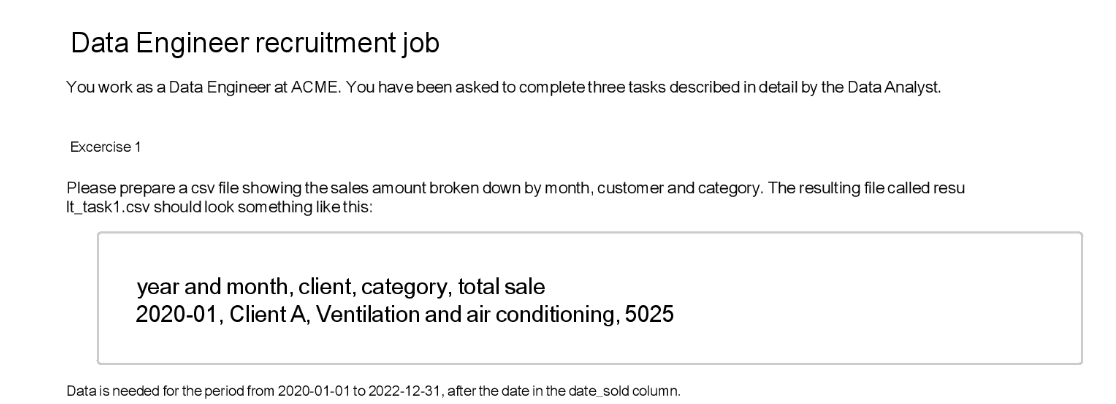

In [170]:
QUERY = """
Select x.year_and_month, x.client, x.category, sum(x.total_sale) as total_sale
from
(
SELECT 
DATE_FORMAT(a.date_sold, "%Y %m") as year_and_month, c.name as client, b.category_name as category, (unit_price  * quantity) as total_sale FROM
    sales a
        left join category b on a.categoryId = b.id
        left join client c on a.client_id = c.id
    where
    a.date_sold between '2020-01-01' and '2022-12-31'
) x
group by 
x.year_and_month, x.client, x.category
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn1)
df

C:\Users\ll\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_and_month,client,category,total_sale
0,2020 01,Klient A,Wentylacja i klimatyzacja,3180.0
1,2020 01,Klient B,Wentylacja i klimatyzacja,8650.0
2,2020 01,Klient C,Ogólnobudowlana,900.0
3,2020 01,Klient C,Pomiary Elektyczne,1800.0
4,2020 01,Klient C,Wentylacja i klimatyzacja,584.0
...,...,...,...,...
106,2021 12,Klient C,Ogólnobudowlana,50.0
107,2022 01,Klient A,Wentylacja i klimatyzacja,4260.0
108,2022 01,Klient B,Wentylacja i klimatyzacja,730.0
109,2022 01,Klient C,Wentylacja i klimatyzacja,70.0


In [177]:
# save to csv
df.to_csv(r'C:\Users\ll\Desktop\result_task1.csv')

# Task 2
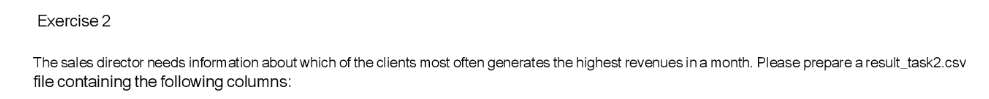
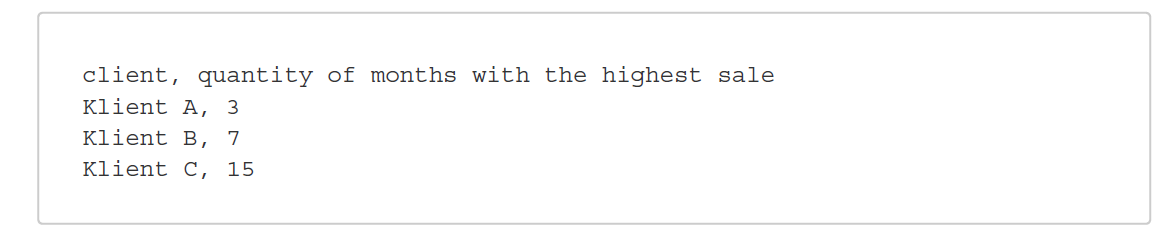
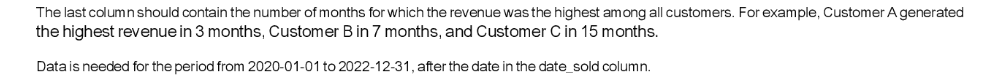

In [173]:
QUERY1 = """
WITH Sales_CTE  (year, month, client, sum_total_sale, max_total_sale)
AS
(
  select y.year, y.month, y.client,y.sum_total_sale,  max(y.sum_total_sale) OVER(PARTITION BY y.year, y.month) AS max_total_sale
from
(

SELECT x.year, x.month, x.client, sum(x.total_sale) as sum_total_sale
from
(
SELECT 
DATE_FORMAT(a.date_sold, "%y") as year ,DATE_FORMAT(a.date_sold, "%m") as month, c.name as client, (unit_price  * quantity) as total_sale FROM
    sales a
        left join client c on a.client_id = c.id
    where
    a.date_sold between '2020-01-01' and '2022-12-31'
) x
group by
x.year, x.month, x.client
) y
)


SELECT client, count(month) as quantity_of_months_with_the_highest_sale
FROM Sales_CTE
where
sum_total_sale = max_total_sale
group by
client




"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df2 = pd.read_sql_query(QUERY1,conn1)
df2


C:\Users\ll\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client,quantity_of_months_with_the_highest_sale
0,Klient B,7
1,Klient C,15
2,Klient A,3


In [178]:
# save to csv
df2.to_csv(r'C:\Users\ll\Desktop\result_task2.csv')

# Task 3
As part of the task, you must prepare a data processing process that will combine two sources: the MySQL database from the previous ones
tasks and the planned_margin.csv file (link to the file below). The data should be combined by the category_name column. Based on the expected percentage margin from the planned_margin.csv file, calculate the expected margin in PLN in a given month. The resulting file called result_task3.csv should look something like this:
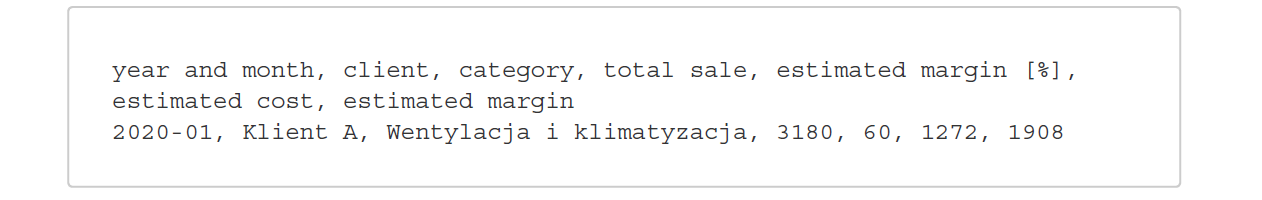

total sale = column from MySQL database<br>
estimated margin [%] = column from planned_margin.csv file<br>
estimated margin = total sale * estimated margin [%]<br>
estimated cost = total sale - estimated margin<br>

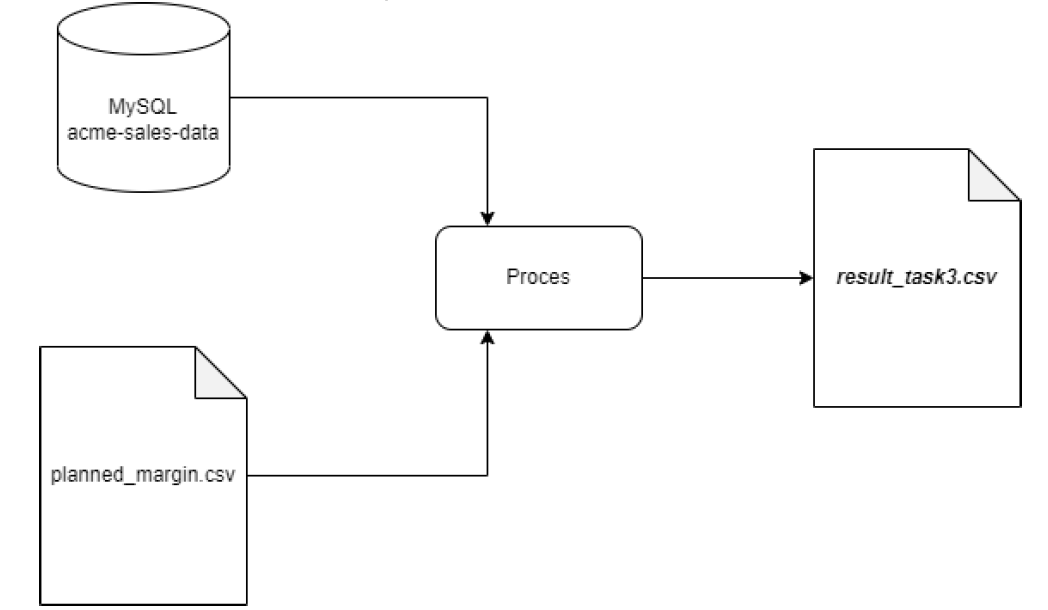

In [94]:
# sql query from 1 task

tab1 = pd.read_sql_query(QUERY,conn1)
tab1

C:\Users\ll\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_and_month,client,category,total_sale
0,2020 01,Klient A,Wentylacja i klimatyzacja,3180.0
1,2020 01,Klient B,Wentylacja i klimatyzacja,8650.0
2,2020 01,Klient C,Ogólnobudowlana,900.0
3,2020 01,Klient C,Pomiary Elektyczne,1800.0
4,2020 01,Klient C,Wentylacja i klimatyzacja,584.0
...,...,...,...,...
106,2021 12,Klient C,Ogólnobudowlana,50.0
107,2022 01,Klient A,Wentylacja i klimatyzacja,4260.0
108,2022 01,Klient B,Wentylacja i klimatyzacja,730.0
109,2022 01,Klient C,Wentylacja i klimatyzacja,70.0


In [163]:
# downloading data from the website

url="https://sescomt.blob.core.windows.net/csv-test-data/planned_margin.csv"
tab2=pd.read_csv(url)

# checking what type of data the columns contain

tab2.dtypes

# remove whitespace from column names
tab2.columns = tab2.columns.str.strip()

# removing the % sign from the data in the estimated margin % column
tab2['estimated margin %'] = tab2['estimated margin %'].str.replace('%',"")

# change the data type of the estimated margin % column from object to int

tab2['estimated margin %']  = tab2['estimated margin %'].astype(int)

# recheck column data type
tab2.dtypes

# multiply the estimated margin % column values by 0.01 to make them percentages
tab2['estimated margin %'] = tab2['estimated margin %'] * 0.01
tab2

,category_name,estimated margin %
0,Wentylacja i klimatyzacja,0.60
1,Ogólnobudowlana,0.70
2,Pomiary Elektyczne,0.65


In [166]:
# change the name of the column in table 1 to match the name of the column in table 2

tab1.rename(columns={'category':'category_name'}, inplace=True)

# join tab1 and tab2 after the category_name column
wynik = pd.merge(tab1, tab2, on = "category_name", how = "inner")


wynik


,year_and_month,client,category_name,total_sale,estimated margin %
0,2020 01,Klient A,Wentylacja i klimatyzacja,3180.0,0.60
1,2020 02,Klient A,Wentylacja i klimatyzacja,4090.0,0.60
2,2020 03,Klient A,Wentylacja i klimatyzacja,3215.0,0.60
3,2020 04,Klient A,Wentylacja i klimatyzacja,3910.0,0.60
4,2020 05,Klient A,Wentylacja i klimatyzacja,2300.0,0.60
...,...,...,...,...,...
57,2021 01,Klient C,Pomiary Elektyczne,2160.0,0.65
58,2021 08,Klient C,Pomiary Elektyczne,2440.0,0.65
59,2021 09,Klient C,Pomiary Elektyczne,100.0,0.65
60,2021 10,Klient C,Pomiary Elektyczne,1320.0,0.65


In [169]:
# adding an estimated margin column
# estimated margin = total sale * estimated margin [%]

wynik['estimated margin'] = wynik['total_sale'] * wynik['estimated margin %']

# adding an estimated cost column
# estimated cost = total sale - estimated margin

wynik['estimated cost'] = wynik['total_sale'] - wynik['estimated margin']

wynik

,year_and_month,client,category_name,total_sale,estimated margin %,estimated margin,estimated cost
0,2020 01,Klient A,Wentylacja i klimatyzacja,3180.0,0.60,1908.0,1272.0
1,2020 02,Klient A,Wentylacja i klimatyzacja,4090.0,0.60,2454.0,1636.0
2,2020 03,Klient A,Wentylacja i klimatyzacja,3215.0,0.60,1929.0,1286.0
3,2020 04,Klient A,Wentylacja i klimatyzacja,3910.0,0.60,2346.0,1564.0
4,2020 05,Klient A,Wentylacja i klimatyzacja,2300.0,0.60,1380.0,920.0
...,...,...,...,...,...,...,...
57,2021 01,Klient C,Pomiary Elektyczne,2160.0,0.65,1404.0,756.0
58,2021 08,Klient C,Pomiary Elektyczne,2440.0,0.65,1586.0,854.0
59,2021 09,Klient C,Pomiary Elektyczne,100.0,0.65,65.0,35.0
60,2021 10,Klient C,Pomiary Elektyczne,1320.0,0.65,858.0,462.0


In [179]:
# save to csv
wynik.to_csv(r'C:\Users\ll\Desktop\result_task3.csv')